# Stock Market Analysis Prediction Project

In [1]:
# Importing the all required libraties
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv(r"C:\Users\91933\Downloads\prices-split-adjusted.csv.zip")
data

,date,symbol,open,close,low,high,volume
0,2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0
...,...,...,...,...,...,...,...
851259,2016-12-30,ZBH,103.309998,103.199997,102.849998,103.930000,973800.0
851260,2016-12-30,ZION,43.070000,43.040001,42.689999,43.310001,1938100.0
851261,2016-12-30,ZTS,53.639999,53.529999,53.270000,53.740002,1701200.0
851262,2016-12-30,AIV,44.730000,45.450001,44.410000,45.590000,1380900.0


In [3]:
data.head()

,date,symbol,open,close,low,high,volume
0,2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


In [4]:
data.describe()

,open,close,low,high,volume
count,851264.000000,851264.000000,851264.000000,851264.000000,8.512640e+05
mean,64.993618,65.011913,64.336541,65.639748,5.415113e+06
std,75.203893,75.201216,74.459518,75.906861,1.249468e+07
min,1.660000,1.590000,1.500000,1.810000,0.000000e+00
25%,31.270000,31.292776,30.940001,31.620001,1.221500e+06
50%,48.459999,48.480000,47.970001,48.959999,2.476250e+06
75%,75.120003,75.139999,74.400002,75.849998,5.222500e+06
max,1584.439941,1578.130005,1549.939941,1600.930054,8.596434e+08


In [5]:
for i in data.columns:
    print(i,"\t-\t",data[i].isna().mean()*100)

date 	-	 0.0
symbol 	-	 0.0
open 	-	 0.0
close 	-	 0.0
low 	-	 0.0
high 	-	 0.0
volume 	-	 0.0


C:\Users\91933\AppData\Local\Temp\ipykernel_11468\1211363923.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cormap = data.corr()


<Axes: >

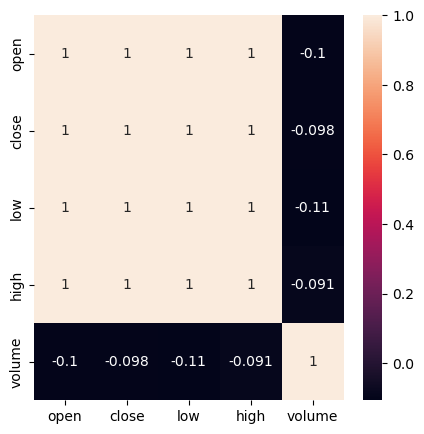

In [6]:
data = data[data['symbol']=='AAP']   # Choosin stock values for any company 

cormap = data.corr()
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(cormap, annot = True)

In [7]:
def get_corelated_col(cor_dat, threshold): 
  # Cor_data to be column along which corelation to be measured 
  #Threshold be the value above which of corelation to considered
  feature=[]
  value=[]

  for i ,index in enumerate(cor_dat.index):
    if abs(cor_dat[index]) > threshold:
      feature.append(index)
      value.append(cor_dat[index])

  data = pd.DataFrame(data = value, index = feature, columns=['corr value'])
  return data

In [8]:
top_corelated_values = get_corelated_col(cormap['close'], 0.60)
top_corelated_values

,corr value
open,0.999382
close,1.000000
low,0.999615
high,0.999737


**Looks like all colums except volume are highly co-related. Using them for predictions.**

In [9]:
data = data[top_corelated_values.index]
data.head()

,open,close,low,high
253,40.700001,40.380001,40.360001,41.040001
720,40.299999,40.139999,39.720001,40.310001
1188,40.049999,40.490002,40.049999,40.779999
1656,39.549999,40.480000,39.549999,40.540001
2124,40.250000,40.639999,40.110001,40.820000


In [10]:
data.shape

(1762, 4)

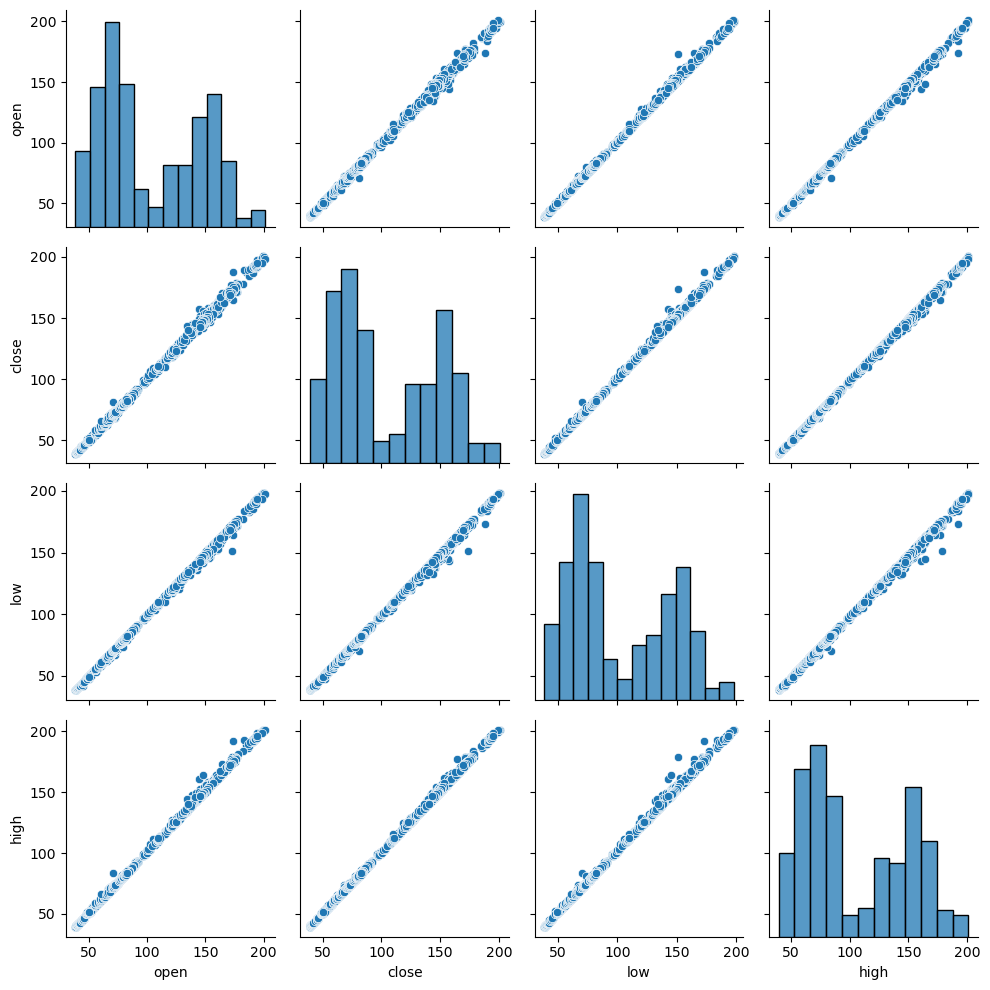

In [11]:
sns.pairplot(data)
plt.tight_layout()

In [12]:
X = data.drop(['close'], axis=1)
y = data['close']

**Since range of data in different columns veries significantly we need to scale the independent variable i.e. X. For this we will use Min-Max Scaling.**

In [13]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X.head()

,open,low,high
0,0.012001,0.012392,0.010256
1,0.009539,0.008387,0.005746
2,0.008000,0.010452,0.008649
3,0.004923,0.007323,0.007167
4,0.009231,0.010827,0.008897


**Prediction Model**

In [14]:
#now lets split data in test train pairs

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle=False)

Acc = []

**Linear Regression**

In [15]:
from sklearn.linear_model import LinearRegression

# model training

model_1 = LinearRegression()
model_1.fit(X_train, y_train)

LinearRegression()

In [16]:
# prediction
y_pred_1 = model_1.predict(X_test)
pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_1})
pred_df.head()

,Actual,Predicted
675111,173.660004,173.682489
675608,171.919998,172.593759
676105,172.000000,171.182789
676602,187.789993,187.980305
677099,187.029999,188.440838


In [17]:
# Measure the Accuracy Score

from sklearn.metrics import r2_score
 
print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred_1)))
Acc.append(r2_score(y_test, y_pred_1))

Accuracy score of the predictions: 0.9931342019332019


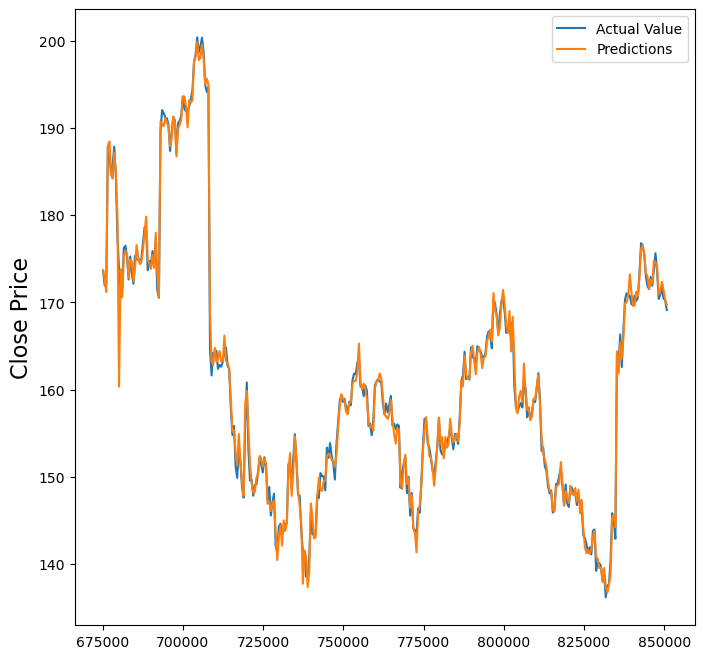

In [18]:
plt.figure(figsize=(8,8))
plt.ylabel('Close Price', fontsize=16)
plt.plot(pred_df)
plt.legend(['Actual Value', 'Predictions'])
plt.show()

# ANN

In [29]:
# Model Creation

from keras.models import Sequential
from keras.layers import Dense

def regressor(inp_dim):
    
    model = Sequential()
    
    model.add(Dense(20, input_dim=inp_dim, kernel_initializer='normal', activation='relu'))
    model.add(Dense(25, kernel_initializer='normal', activation='relu'))
    model.add(Dense(10, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    return model

In [30]:
# Model Training

model_2 = regressor(inp_dim=3)
model_2.fit(X_train, y_train, epochs=70, validation_split=0.2)

Epoch 1/70
36/36 [==============================] - 2s 15ms/step - loss: 6058.0630 - val_loss: 22084.4395
Epoch 2/70
36/36 [==============================] - 0s 5ms/step - loss: 6040.0581 - val_loss: 21979.4766
Epoch 3/70
36/36 [==============================] - 0s 4ms/step - loss: 5950.8550 - val_loss: 21437.9883
Epoch 4/70
36/36 [==============================] - 0s 4ms/step - loss: 5616.2549 - val_loss: 19642.4746
Epoch 5/70
36/36 [==============================] - 0s 4ms/step - loss: 4755.1470 - val_loss: 15531.8223
Epoch 6/70
36/36 [==============================] - 0s 4ms/step - loss: 3169.9890 - val_loss: 9058.2402
Epoch 7/70
36/36 [==============================] - 0s 5ms/step - loss: 1286.0106 - val_loss: 2922.0754
Epoch 8/70
36/36 [==============================] - 0s 4ms/step - loss: 196.8878 - val_loss: 484.5939
Epoch 9/70
36/36 [==============================] - 0s 4ms/step - loss: 26.5914 - val_loss: 212.9944
Epoch 10/70
36/36 [==============================] - 0s 5ms/ste

In [31]:
# Prediction

y_pred_2 = model_2.predict(X_test)

12/12 [==============================] - 0s 3ms/step


In [32]:
pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_2.flatten()})
pred_df.head()

,Actual,Predicted
675111,173.660004,174.177689
675608,171.919998,172.489014
676105,172.000000,170.700897
676602,187.789993,179.429077
677099,187.029999,188.235092


In [34]:
# Measure the Accuracy Score

from sklearn.metrics import r2_score
 
print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred_2)))
Acc.append(r2_score(y_test, y_pred_2))


Accuracy score of the predictions: 0.9876958589298724


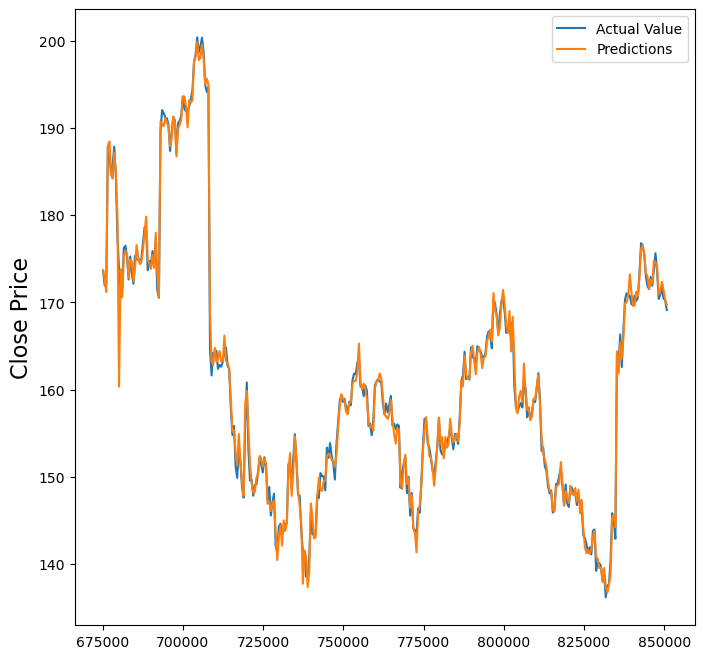

In [22]:
plt.figure(figsize=(8,8))
plt.ylabel('Close Price', fontsize=16)
plt.plot(pred_df)
plt.legend(['Actual Value', 'Predictions'])
plt.show()

# CNN

In [36]:
X_train = np.array(X_train).reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = np.array(X_test).reshape(X_test.shape[0], X_test.shape[1], 1)

In [37]:
from tensorflow.keras import Sequential,utils
from tensorflow.keras.layers import Flatten, Dense, Conv1D, MaxPool1D, Dropout

def reg():
    
    model = Sequential()
    
    model.add(Conv1D(32, kernel_size=(3,), padding='same', activation='relu', input_shape = (X_train.shape[1],1)))
    model.add(Conv1D(64, kernel_size=(3,), padding='same', activation='relu'))
    model.add(Conv1D(128, kernel_size=(5,), padding='same', activation='relu'))
    
    model.add(Flatten())
    
    model.add(Dense(50, activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(units = 1))
    
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    return model

In [39]:
# Model Training

model_3 = reg()
model_3.fit(X_train, y_train, epochs=100, validation_split=0.2)

Epoch 1/100
36/36 [==============================] - 3s 16ms/step - loss: 4588.9683 - val_loss: 2.1489
Epoch 2/100
36/36 [==============================] - 0s 6ms/step - loss: 151.4242 - val_loss: 66.4687
Epoch 3/100
36/36 [==============================] - 0s 7ms/step - loss: 3.8255 - val_loss: 2.2598
Epoch 4/100
36/36 [==============================] - 0s 7ms/step - loss: 0.5272 - val_loss: 1.7450
Epoch 5/100
36/36 [==============================] - 0s 8ms/step - loss: 0.4236 - val_loss: 1.6336
Epoch 6/100
36/36 [==============================] - 0s 7ms/step - loss: 0.4207 - val_loss: 1.6094
Epoch 7/100
36/36 [==============================] - 0s 7ms/step - loss: 0.4162 - val_loss: 1.6715
Epoch 8/100
36/36 [==============================] - 0s 7ms/step - loss: 0.4218 - val_loss: 1.6092
Epoch 9/100
36/36 [==============================] - 0s 7ms/step - loss: 0.4303 - val_loss: 1.6119
Epoch 10/100
36/36 [==============================] - 0s 7ms/step - loss: 0.4354 - val_loss: 1.7891
Ep

In [41]:
# Prediction

y_pred_3 = model_3.predict(X_test)

12/12 [==============================] - 0s 2ms/step


In [42]:
pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_3.flatten()})
pred_df.head()

,Actual,Predicted
675111,173.660004,174.372635
675608,171.919998,172.744537
676105,172.000000,170.953354
676602,187.789993,180.198273
677099,187.029999,188.605911


In [43]:
# Measure the Accuracy Score

from sklearn.metrics import r2_score
 
print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred_3)))
Acc.append(r2_score(y_test, y_pred_3))

Accuracy score of the predictions: 0.9889339337137144


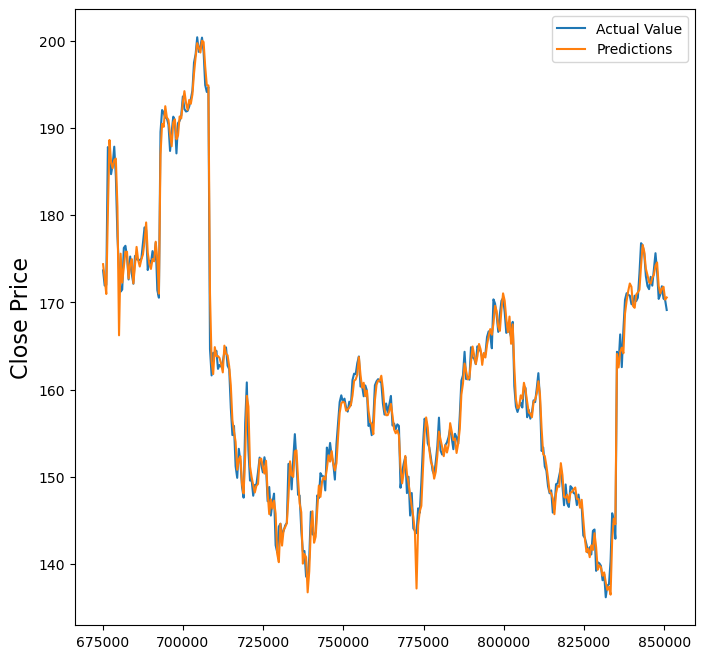

In [44]:
plt.figure(figsize=(8,8))
plt.ylabel('Close Price', fontsize=16)
plt.plot(pred_df)
plt.legend(['Actual Value', 'Predictions'])
plt.show()

Comparision of accuracies of different models

ValueError: x and y must have same first dimension, but have shapes (3,) and (5,)

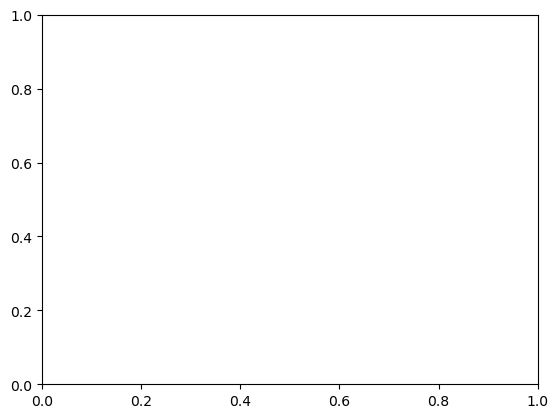

In [45]:
plt.plot(range(3), Acc, color='green', linestyle='dashed', linewidth = 3, 
         marker='o', markerfacecolor='blue', markersize=12) 
plt.ylabel('Acc')
plt.xlabel('Models')
plt.title("Accuracies")
plt.xticks(range(3), ['Linear Regression', 'ANN', 'CNN'])
plt.show()

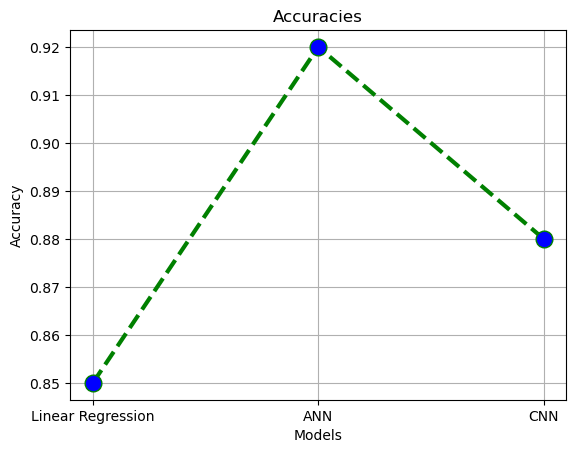

In [48]:
import matplotlib.pyplot as plt  # Import Matplotlib

# Data: Replace Acc and Models with your actual data
Acc = [0.85, 0.92, 0.88]  # Accuracy values for three models
Models = ['Linear Regression', 'ANN', 'CNN']  # Model names

# Create the plot
plt.plot(range(len(Models)), Acc, color='green', linestyle='dashed', linewidth=3, 
         marker='o', markerfacecolor='blue', markersize=12)

# Add labels and title
plt.ylabel('Accuracy')
plt.xlabel('Models')
plt.title("Accuracies")

# Set x-axis ticks with model names
plt.xticks(range(len(Models)), Models)

# Show the plot
plt.grid(True)  # Add a grid for better visualization (optional)
plt.show()


***Now converting data in a time series data and appliying some more models***

In [49]:
close = data.reset_index()['close']
close.head()

0    40.380001
1    40.139999
2    40.490002
3    40.480000
4    40.639999
Name: close, dtype: float64

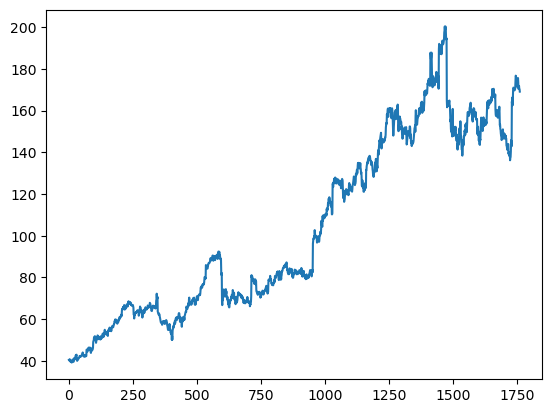

In [50]:
plt.plot(close)
plt.show()

In [51]:
time_step = 30
X, y = [], []

for i in range(len(close)-time_step-1):
    X.append(close[i:(i+time_step)])
    y.append(close[(i+time_step)])

X = np.array(X)
y = np.array(y)

In [53]:
X[:5]

array([[40.380001, 40.139999, 40.490002, 40.48    , 40.639999, 40.240002,
        39.540001, 40.09    , 39.560001, 39.310001, 39.5     , 39.16    ,
        39.23    , 39.740002, 40.5     , 40.549999, 40.59    , 39.77    ,
        39.450001, 40.490002, 41.189999, 41.189999, 40.93    , 40.720001,
        40.810001, 41.57    , 42.330002, 42.549999, 42.810001, 42.630001],
       [40.139999, 40.490002, 40.48    , 40.639999, 40.240002, 39.540001,
        40.09    , 39.560001, 39.310001, 39.5     , 39.16    , 39.23    ,
        39.740002, 40.5     , 40.549999, 40.59    , 39.77    , 39.450001,
        40.490002, 41.189999, 41.189999, 40.93    , 40.720001, 40.810001,
        41.57    , 42.330002, 42.549999, 42.810001, 42.630001, 42.880001],
       [40.490002, 40.48    , 40.639999, 40.240002, 39.540001, 40.09    ,
        39.560001, 39.310001, 39.5     , 39.16    , 39.23    , 39.740002,
        40.5     , 40.549999, 40.59    , 39.77    , 39.450001, 40.490002,
        41.189999, 41.189999, 40.93 

# prediction

In [54]:
#now lets split data in test train pairs

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle=False)

Acc = []

**LSTM

In [55]:
X_train_ = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test_ = X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [56]:
from tensorflow.keras.layers import LSTM

def Reg():
    model = Sequential()
    
    model.add(LSTM(70, return_sequences=True, input_shape=(30,1)))
    model.add(LSTM(70, return_sequences=True))
    model.add(LSTM(70))
    model.add(Dense(1))
    
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    return model
model_1 = reg()
model_1.fit(X_train_, y_train, epochs=100, validation_split=0.2)

Epoch 1/100
35/35 [==============================] - 3s 21ms/step - loss: 399.4447 - val_loss: 42.4766
Epoch 2/100
35/35 [==============================] - 0s 13ms/step - loss: 17.4375 - val_loss: 49.4431
Epoch 3/100
35/35 [==============================] - 1s 15ms/step - loss: 16.0979 - val_loss: 26.7944
Epoch 4/100
35/35 [==============================] - 1s 15ms/step - loss: 12.7503 - val_loss: 26.8197
Epoch 5/100
35/35 [==============================] - 1s 15ms/step - loss: 12.8980 - val_loss: 25.0883
Epoch 6/100
35/35 [==============================] - 0s 14ms/step - loss: 11.0206 - val_loss: 21.2968
Epoch 7/100
35/35 [==============================] - 1s 14ms/step - loss: 12.4719 - val_loss: 24.8270
Epoch 8/100
35/35 [==============================] - 1s 15ms/step - loss: 10.4753 - val_loss: 18.0408
Epoch 9/100
35/35 [==============================] - 1s 15ms/step - loss: 9.0282 - val_loss: 31.6130
Epoch 10/100
35/35 [==============================] - 1s 16ms/step - loss: 7.5217 

In [58]:
# Prediction

y_pred_1 = model_1.predict(X_test_)

11/11 [==============================] - 0s 5ms/step


In [59]:
pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_1.flatten()})
pred_df.head()

,Actual,Predicted
0,184.690002,187.546417
1,185.770004,185.577820
2,187.839996,185.832245
3,184.449997,187.816452
4,177.539993,184.542694


In [60]:
# Measure the Accuracy Score

from sklearn.metrics import r2_score
 
print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred_1)))
Acc.append(r2_score(y_test, y_pred_1))

Accuracy score of the predictions: 0.9500189791441159


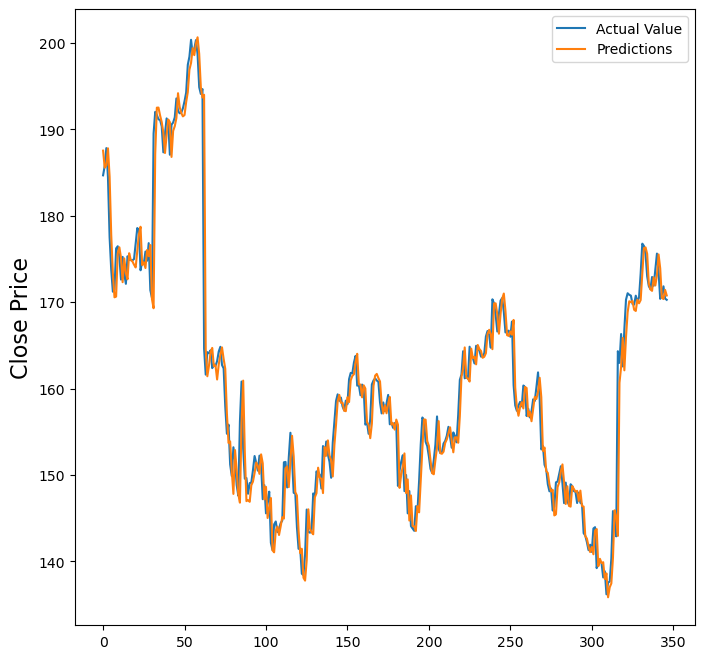

In [61]:
plt.figure(figsize=(8,8))
plt.ylabel('Close Price', fontsize=16)
plt.plot(pred_df)
plt.legend(['Actual Value', 'Predictions'])
plt.show()

***ANN

In [62]:
# Model Training

model_2 = regressor(inp_dim=30)
model_2.fit(X_train, y_train, epochs=100, validation_split=0.2)

Epoch 1/100
35/35 [==============================] - 2s 12ms/step - loss: 6278.2134 - val_loss: 22235.3730
Epoch 2/100
35/35 [==============================] - 0s 5ms/step - loss: 5632.1860 - val_loss: 14306.0186
Epoch 3/100
35/35 [==============================] - 0s 5ms/step - loss: 1284.1652 - val_loss: 570.9609
Epoch 4/100
35/35 [==============================] - 0s 5ms/step - loss: 40.5582 - val_loss: 31.4563
Epoch 5/100
35/35 [==============================] - 0s 5ms/step - loss: 15.8214 - val_loss: 31.7683
Epoch 6/100
35/35 [==============================] - 0s 5ms/step - loss: 15.4069 - val_loss: 30.5330
Epoch 7/100
35/35 [==============================] - 0s 5ms/step - loss: 15.2835 - val_loss: 30.4539
Epoch 8/100
35/35 [==============================] - 0s 6ms/step - loss: 15.2815 - val_loss: 30.4367
Epoch 9/100
35/35 [==============================] - 0s 5ms/step - loss: 15.1754 - val_loss: 30.3198
Epoch 10/100
35/35 [==============================] - 0s 5ms/step - loss: 15.

In [63]:
# Prediction

y_pred_2 = model_2.predict(X_test)

11/11 [==============================] - 0s 2ms/step


In [64]:
# Measure the Accuracy Score

from sklearn.metrics import r2_score
 
print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred_2)))
Acc.append(r2_score(y_test, y_pred_2))

Accuracy score of the predictions: 0.8036841643338474


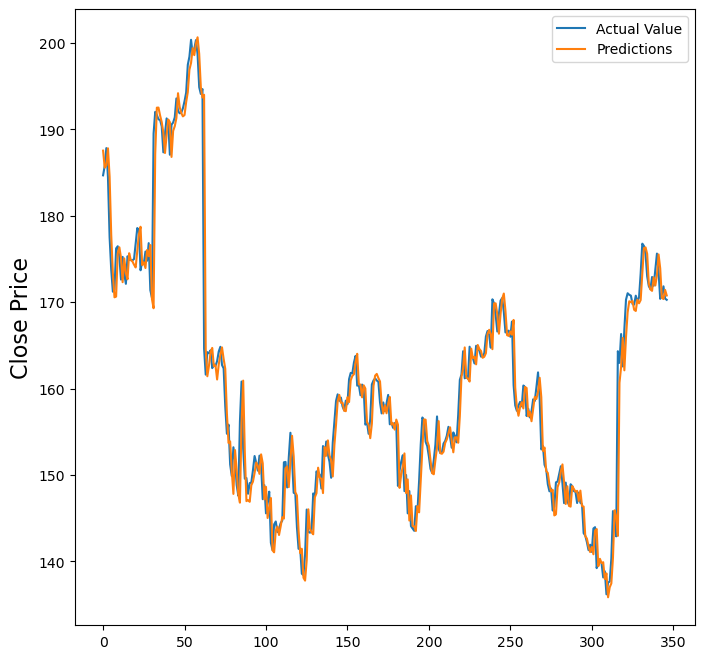

In [65]:
plt.figure(figsize=(8,8))
plt.ylabel('Close Price', fontsize=16)
plt.plot(pred_df)
plt.legend(['Actual Value', 'Predictions'])
plt.show()

# CNN

In [66]:
# Model Training

model_3 = reg()
model_3.fit(X_train_, y_train, epochs=100, validation_split=0.2)

Epoch 1/100
35/35 [==============================] - 3s 24ms/step - loss: 299.9150 - val_loss: 36.7885
Epoch 2/100
35/35 [==============================] - 1s 16ms/step - loss: 17.4544 - val_loss: 30.3974
Epoch 3/100
35/35 [==============================] - 1s 16ms/step - loss: 15.1935 - val_loss: 32.9857
Epoch 4/100
35/35 [==============================] - 1s 16ms/step - loss: 14.7866 - val_loss: 38.6306
Epoch 5/100
35/35 [==============================] - 1s 16ms/step - loss: 12.5355 - val_loss: 25.9210
Epoch 6/100
35/35 [==============================] - 1s 16ms/step - loss: 13.6096 - val_loss: 25.5013
Epoch 7/100
35/35 [==============================] - 1s 16ms/step - loss: 11.1573 - val_loss: 20.5730
Epoch 8/100
35/35 [==============================] - 1s 16ms/step - loss: 15.4842 - val_loss: 21.2040
Epoch 9/100
35/35 [==============================] - 1s 15ms/step - loss: 11.6117 - val_loss: 71.7182
Epoch 10/100
35/35 [==============================] - 1s 14ms/step - loss: 10.845

In [67]:
# Prediction

y_pred_3 = model_3.predict(X_test_)

11/11 [==============================] - 0s 5ms/step


In [68]:
pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_3.flatten()})
pred_df.head()

,Actual,Predicted
0,184.690002,186.151520
1,185.770004,183.964783
2,187.839996,184.565674
3,184.449997,186.950882
4,177.539993,184.208878


In [69]:
# Measure the Accuracy Score

from sklearn.metrics import r2_score
 
print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred_3)))
Acc.append(r2_score(y_test, y_pred_3))

Accuracy score of the predictions: 0.9472723127992722


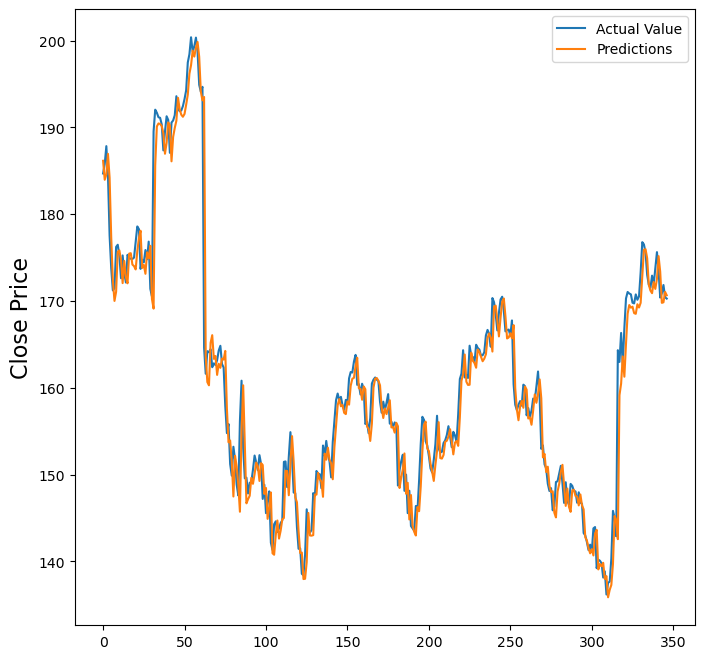

In [70]:
plt.figure(figsize=(8,8))
plt.ylabel('Close Price', fontsize=16)
plt.plot(pred_df)
plt.legend(['Actual Value', 'Predictions'])
plt.show()

**Comparision of Accuracies of different models**

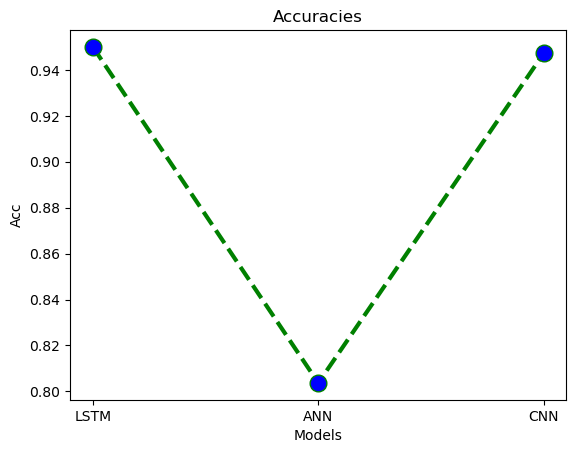

In [71]:
plt.plot(range(3), Acc, color='green', linestyle='dashed', linewidth = 3, 
         marker='o', markerfacecolor='blue', markersize=12) 
plt.ylabel('Acc')
plt.xlabel('Models')
plt.title("Accuracies")
plt.xticks(range(3), ['LSTM', 'ANN', 'CNN'])
plt.show()

# THANKYOU